## 场景描述
- 当我们到一家公司入职数据分析师的时候，现在有另外一个同事把一个数据分析的工作交给我们，但是这份数据是刚刚导出成Excel的，同事直接扔给了我们一个压缩包或者一个文件夹，所有的数据文件都在这个文件夹当中，我们该如何快速的做数据整合和分析呢？

## 主要知识点
- 递归：主要的目的是遍历文件夹和文件
- 文件夹和文件的属性判断

In [20]:
## 函数的调用，一个函数调用另外一个函数
def f1():
    print(1)
def f2():
    f1()
    print(2)
f2()

1
2


In [21]:
## 递归的意思是，函数自己调用自己



def f3(n):
    print(n)
    n += 1
    f3(n)
f3(1)



# 这个代码会抛出一个错误：RecursionError: maximum recursion depth exceeded in comparison
# 超出最大递归深度异常


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
import sys
sys.setrecursionlimit(100)

def f3(n):
    print(n)
    n += 1
    f3(n)
f3(1)

In [ ]:
## 让递归停下来
def f(n):  
    print(n)
    n += 1
    if n == 10:
        return
    else:
        f(n)
f(1)

In [ ]:
##  求和
def f(n):
    if n == 0:
        return 0
    return n + f(n-1)
f(5)

## 使用Python来进行文件和文件夹的判断

In [ ]:
## 列出目标文件夹下的所有文件（文件即包含我们平时理解的文本文件和文件夹）
import os
# 声明根目录（这个目录就是同事给到我们的那个包含所有文件的目录）
path = './data'
# 拿到这个文件夹下的所有文件
files = os.listdir(path)
files

# 处理这些文件
for file in files:
    # 判断这些文件到底是文件夹还是文件
    # 路径拼接  
    if os.path.isfile(path + "/" + file):
        print(file + "是一个文件")
        
        # 当我们知道这是一个文件的时候，我们就要判断到底是个什么类型的文件
        filename,extension = os.path.splitext(file)
        if extension == '.txt':
            print(filename + "是一个文本文件")
        elif extension == '.xlsx':
            print(filename + "是一个Excel文件")
        elif extension == ".csv":
            print(filename + "是一个csv文件")
    
    if os.path.isdir(path + "/" + file):
        print(file + "是一个文件夹")


In [ ]:
import pandas as pd
## 列出目标文件夹下的所有文件（文件即包含我们平时理解的文本文件和文件夹）
import os
# 声明根目录（这个目录就是同事给到我们的那个包含所有文件的目录）
path = './data'



def get_all_files(path):
    print(">>>>>>>这是递归新的开始<<<<<<<<<<")

    # 拿到这个文件夹下的所有文件
    files = os.listdir(path)


    # 处理这些文件
    for file in files:
        # 判断这些文件到底是文件夹还是文件
        # 路径拼接  
        if os.path.isfile(path + "/" + file):
            print(file + "是一个文件")

            # 当我们知道这是一个文件的时候，我们就要判断到底是个什么类型的文件
            filename,extension = os.path.splitext(file)
            if extension == '.txt':
                print(filename + "是一个文本文件")
                data = pd.read_table(path + "/" + file)
                print(data)
            elif extension == '.xlsx':
                print(filename + "是一个Excel文件")
                data = pd.read_excel(path + "/" + file)
                print(data)
            elif extension == ".csv":
                print(filename + "是一个csv文件")
                data = pd.read_csv(path + "/" + file)
                print(data)

        if os.path.isdir(path + "/" + file):
            print("::::::::::"+file + "是一个文件夹::::::::::")
            # 递归调用，把文件夹传入到get_all_files这个函数中，继续判断是文件还是文件夹，获取到这个文件夹下的所有内容
            get_all_files(path + "/" + file)
get_all_files(path)

## 合并数据

In [ ]:
import pandas as pd
import os

path = './project_data'

# 声明一个空的DataFrame用来存储最终合并好的数据
final_data = pd.DataFrame()




def get_all_files(path):
    # 这里是把final_data声明成为一个全局变量，共享起来
    global final_data
    
    print(">>>>>>>这是递归新的开始<<<<<<<<<<")
    # 拿到这个文件夹下的所有文件
    files = os.listdir(path)


    # 处理这些文件
    for file in files:
        # 判断这些文件到底是文件夹还是文件
        # 路径拼接  
        if os.path.isfile(path + "/" + file):
            print(file + "是一个文件")

            # 当我们知道这是一个文件的时候，我们就要判断到底是个什么类型的文件
            filename,extension = os.path.splitext(file)
            if extension == '.txt':
                print(filename + "是一个文本文件")
                data = pd.read_table(path + "/" + file)
                print(data)
            elif extension == '.xlsx':
                print(filename + "是一个Excel文件")
                data = pd.read_excel(path + "/" + file)
                print(data)
            elif extension == ".csv":
                print("**********"+filename + "是一个csv文件,是我们的目标文件**********")
                # 获取文件内容，然后把内容合并到final_data当中
                file_data = pd.read_csv(path+"/" +file)
                # 开始合并数据     ignore_index这个参数的意思是重新排列索引，不用文件中自带的索引
                final_data = final_data.append(file_data,ignore_index=True)
                print(file + ".......合并中")
                

        if os.path.isdir(path + "/" + file):
            print("::::::::::"+file + "是一个文件夹::::::::::")
            # 递归调用，把文件夹传入到get_all_files这个函数中，继续判断是文件还是文件夹，获取到这个文件夹下的所有内容
            get_all_files(path + "/" + file)
get_all_files(path)
print('数据合并完成')





In [ ]:
final_data.head()

In [ ]:
final_data.index

In [22]:
# 删除无用列
final_data.drop(['Unnamed: 0'], axis=1,inplace=True)
final_data.head()

NameError: name 'final_data' is not defined

In [23]:
# 授权码，其实也可以理解成是另外一种密码
passwd = "dkbklkrplukqdjgf"

## 发送一个普通的邮件

In [24]:
import smtplib
from email.mime.text import MIMEText

# 发送者的邮箱
email_name = "2250559000@qq.com"

# 我要发送给谁
msg_to = 'zjy42197393@163.com'

# 邮件正文是什么
content = '测试邮件的内容'
# 这就是获取到了一个设置邮件的对象
msg = MIMEText(content)

# 设置主题
msg['Subject'] = 'Python发送邮件测试'
# 邮件来自于谁
msg['From']='大周老师'

# 再设置要发给谁
msg['To']=msg_to


# 我要执行发送的过程了

# 配置服务器
s = smtplib.SMTP_SSL('smtp.qq.com',465)
# 登陆邮箱
s.login(email_name,passwd)

# 执行发送
s.sendmail(email_name,msg_to,msg.as_string())

# 执行退出
s.quit()


SMTPAuthenticationError: (535, b'Login Fail. Please enter your authorization code to login. More information in http://service.mail.qq.com/cgi-bin/help?subtype=1&&id=28&&no=1001256')

## 发送一个带附件的邮件




In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart


# 发送者的邮箱
email_name = "2250559000@qq.com"

# 我要发送给谁
msg_to = 'zjy42197393@163.com'

# 邮件正文是什么
content = '测试邮件的内容'
# 这就是获取到了一个设置邮件的对象
msg = MIMEMultipart()

part1 = MIMEText(content)

# 附加邮件正文
msg.attach(part1)

# 设置主题
msg['Subject'] = 'Python发送邮件测试'
# 邮件来自于谁
msg['From']='大周老师'

# 再设置要发给谁
msg['To']=msg_to



# 这里我要开始加附件了

# 1、文本类型的附件
att1 = MIMEText(open('./data/学习目标.txt','rb').read(),'plain','urf-8')
att1['Content-Type'] ='applicatioin/octet-stream'

# 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
att1.add_header("Content-Disposition",'attachment',filename=('gbk',"",'我的学习目标.txt'))
msg.attach(att1)


# 2、图片类型的附件
att2 = MIMEText(open('评论.png','rb').read(),'plain','urf-8')
att2['Content-Type'] ='applicatioin/octet-stream'

# 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
att2.add_header("Content-Disposition",'attachment',filename=('gbk',"",'词云图.png'))
msg.attach(att2)


# 3、其他格式的附件
att3 = MIMEText(open('自动化办公.ipynb','rb').read(),'plain','urf-8')
att3['Content-Type'] ='applicatioin/octet-stream'

# 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
att3.add_header("Content-Disposition",'attachment',filename=('gbk',"",'自动化办公.ipynb'))
msg.attach(att3)

# 我要执行发送的过程了

# 配置服务器
s = smtplib.SMTP_SSL('smtp.qq.com',465)
# 登陆邮箱
s.login(email_name,passwd)

# 执行发送
s.sendmail(email_name,msg_to,msg.as_string())

# 执行退出
s.quit()


## 给多人发送邮件

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart


# 发送者的邮箱
email_name = "2250559000@qq.com"

# 我要发送给谁
msg_to = ['zjy42197393@163.com','zhoujingyang@sina.com']

# 我要抄送给谁
acc_to = ["2250559000@qq.com"]


# 邮件正文是什么
content = '测试邮件的内容'
# 这就是获取到了一个设置邮件的对象
msg = MIMEMultipart()

part1 = MIMEText(content)

# 附加邮件正文
msg.attach(part1)

# 设置主题
msg['Subject'] = 'Python发送邮件测试'
# 邮件来自于谁
msg['From']='大周老师'

# 再设置要发给谁
msg['To']=';'.join(msg_to)

# 我要抄送给谁
msg['Cc'] = ';'.join(acc_to)

# 这里我要开始加附件了

# 1、文本类型的附件
att1 = MIMEText(open('./data/学习目标.txt','rb').read(),'plain','urf-8')
att1['Content-Type'] ='applicatioin/octet-stream'

# 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
att1.add_header("Content-Disposition",'attachment',filename=('gbk',"",'我的学习目标.txt'))
msg.attach(att1)


# 2、图片类型的附件
att2 = MIMEText(open('评论.png','rb').read(),'plain','urf-8')
att2['Content-Type'] ='applicatioin/octet-stream'

# 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
att2.add_header("Content-Disposition",'attachment',filename=('gbk',"",'词云图.png'))
msg.attach(att2)


# 3、其他格式的附件
att3 = MIMEText(open('自动化办公.ipynb','rb').read(),'plain','urf-8')
att3['Content-Type'] ='applicatioin/octet-stream'

# 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
att3.add_header("Content-Disposition",'attachment',filename=('gbk',"",'自动化办公.ipynb'))
msg.attach(att3)

# 我要执行发送的过程了

# 配置服务器
s = smtplib.SMTP_SSL('smtp.qq.com',465)
# 登陆邮箱
s.login(email_name,passwd)

# 执行发送
s.sendmail(email_name,msg_to+acc_to,msg.as_string())

# 执行退出
s.quit()


## 封装发送邮件方法

In [25]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart


def send_email(email_name:str
              ,passwd:str
              ,msg_to:list
              ,subject:str
              ,content:str
              ,acc_to:list=None
              ,att_file:list=None
              ,from_name:str=None)->bool:
    """
    发送邮件方法
    :param email_name:发送者邮件地址
    :param passwd:发送者邮箱密码
    :param msg_to:收件人地址列表，参数类型是列表
    :param subject:邮件标题，字符串类型
    :param content:邮件的文本内容，字符串类型
    :param acc_to:抄送人地址列表，参数类型是列表，默认为空
    :param att_file:附件列表，参数类型是列表，默认为空
    :param from_name: 显示发件人的名字，字符串类型，默认为空
    :return bool:成功返回为True，失败返回False 
    
    """

    # 这就是获取到了一个设置邮件的对象
    msg = MIMEMultipart()

    part1 = MIMEText(content)

    # 附加邮件正文
    msg.attach(part1)

    # 设置主题
    msg['Subject'] = subject
    # 邮件来自于谁
    msg['From']= from_name

    # 再设置要发给谁
    msg['To']=';'.join(msg_to)

    # 我要抄送给谁
    msg['Cc'] = ';'.join(acc_to)

    # 这里我要开始加附件了

    # 判断是否有附件
    if len(att_file)>0:
        for file in att_file:
            print(file)
    
            # 1、文本类型的附件
            att = MIMEText(open(file,'rb').read(),'plain','urf-8')
            att['Content-Type'] ='applicatioin/octet-stream'

            
            # 获取文件名字
            file_name_list = file.split('/')
            # 获取最后文件的长度，计算后得到最后一个元素的角标(索引)的数字
            file_number = len(file.split('/'))-1
            file_name = file_name_list[file_number]
            
            # 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
            att.add_header("Content-Disposition",'attachment',filename=('gbk',"",file_name))
            msg.attach(att)


    # 我要执行发送的过程了
    try:
        # 配置服务器
        s = smtplib.SMTP_SSL('smtp.qq.com',465)
        # 登陆邮箱
        s.login(email_name,passwd)

        # 执行发送
        s.sendmail(email_name,msg_to+acc_to,msg.as_string())

        print('发送成功')
        return True

    except s.SMTPException:
        print('发送失败')
        return False
    finally:
         # 执行退出
        s.quit()



In [26]:
    
    
# 发送者的邮箱
email_name = "2250559000@qq.com"

# 我要发送给谁
msg_to = ['zjy42197393@163.com','zhoujingyang@sina.com']

# 我要抄送给谁
acc_to = ["2250559000@qq.com"]
# 邮件正文是什么
content = '测试邮件的内容'

subject =' 自动化发送邮件'

from_name = '大周老师'

# 添加附件
att_file = ['./data/学习目标.txt','评论.png','自动化办公.ipynb']

send_email(email_name=email_name,
           passwd=passwd,
          msg_to=msg_to,
          acc_to=acc_to,
          content=content,
          subject=subject,
          from_name=from_name,
          att_file=att_file)

./data/学习目标.txt
评论.png
自动化办公.ipynb


AttributeError: 'SMTP_SSL' object has no attribute 'SMTPException'

## 发送带漂亮格式的html邮件

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

def send_email(email_name:str
              ,passwd:str
              ,msg_to:list
              ,subject:str
              ,content:str
               ,image_html:bool=False
               ,image_path:dict=None
              ,acc_to:list=None
              ,att_file:list=None
              ,from_name:str=None)->bool:
    """
    发送邮件方法
    :param email_name:发送者邮件地址
    :param passwd:发送者邮箱密码
    :param msg_to:收件人地址列表，参数类型是列表
    :param subject:邮件标题，字符串类型
    :param content:邮件的文本内容，字符串类型
    :param acc_to:抄送人地址列表，参数类型是列表，默认为空
    :param att_file:附件列表，参数类型是列表，默认为空
    :param from_name: 显示发件人的名字，字符串类型，默认为空
    
    :param image_html:布尔值，默认为False，如果为True则包含图片，是HTML格式的正文内容
    :param image_path:图片路径，字典类型{"图片id":"图片路径"}，默认为空，这个参数只有在image_html为True的时候才生效
    
    :return bool:成功返回为True，失败返回False 
    
    """

    # 这就是获取到了一个设置邮件的对象
    msg = MIMEMultipart()

    part1 = MIMEText(content)

    # 附加邮件正文
    msg.attach(part1)

    # 设置主题
    msg['Subject'] = subject
    # 邮件来自于谁
    msg['From']= from_name

    # 再设置要发给谁
    msg['To']=';'.join(msg_to)

    # 我要抄送给谁
    msg['Cc'] = ';'.join(acc_to)

    # 这里我要开始加附件了

    # 判断是否有附件
    if len(att_file)>0:
        for file in att_file:
            print(file)
    
            # 1、文本类型的附件
            att = MIMEText(open(file,'rb').read(),'plain','urf-8')
            att['Content-Type'] ='applicatioin/octet-stream'

            
            # 获取文件名字
            file_name_list = file.split('/')
            # 获取最后文件的长度，计算后得到最后一个元素的角标(索引)的数字
            file_number = len(file.split('/'))-1
            file_name = file_name_list[file_number]
            
            # 注意这里的filename就是我们发送邮件的时候，要显示的那个名字，可以任意写
            att.add_header("Content-Disposition",'attachment',filename=('gbk',"",file_name))
            msg.attach(att)

    # 判断是否是html格式，然后对图片内容进行挂载
    if image_html:
        msg.attach(MIMEText(content,"html",'utf-8'))
        for image_id,image_path in image_path.items():
            print(image_path)
            file = open(image_path,'rb')
            img_data = file.read()
            file.close()
            
            img = MIMEImage(img_data)
            img.add_header("Content-ID",image_id)
            msg.attach(img)
    else:
        msg.attach(MIMEText(content))

    # 我要执行发送的过程了
    try:
        # 配置服务器
        s = smtplib.SMTP_SSL('smtp.qq.com',465)
        # 登陆邮箱
        s.login(email_name,passwd)

        # 执行发送
        s.sendmail(email_name,msg_to+acc_to,msg.as_string())

        print('发送成功')
        return True

    except s.SMTPException:
        print('发送失败')
        return False
    finally:
         # 执行退出
        s.quit()



In [ ]:
# 邮件正文是什么
content = """
<html>
    <body>
        <h1>数据分析报告</h1>
        <img src='cid:imageid' alt='imageid'>
        <br>
        <img src='cid:imageid1' alt='imageid1'>
    </body>
</html>

"""

image_path={'imageid':'评论.png',
           'imageid1':'评论1.png'}

    
# 发送者的邮箱
email_name = "2250559000@qq.com"

# 我要发送给谁
msg_to = ['zjy42197393@163.com','zhoujingyang@sina.com']

# 我要抄送给谁
acc_to = ["2250559000@qq.com"]


subject =' 自动化发送邮件'

from_name = '大周老师'

# 添加附件
att_file = ['./data/学习目标.txt','评论.png','自动化办公.ipynb']

send_email(email_name=email_name,
           passwd=passwd,
          msg_to=msg_to,
          acc_to=acc_to,
          content=content,
           image_html=True,
           image_path=image_path,
          subject=subject,
          from_name=from_name,
          att_file=att_file)

## 在正文中，把文字写的漂亮一些

In [27]:
# 邮件正文是什么
content = """
<html>
    <body>
        <h1>用户行为分析报告</h1>
        <ol>
            <li>项目背景</li>
            <p>流量费用日益增长，为帮助公司发挥现有用户的最大价值，分析各环节用户流失情况，故此进行此次分析</p>
            <img src='cid:imageid' alt='imageid'>
            <li>分析过程</li>
            <p>此次使用某电商平台的用户数据，共计1200万用户行为数据，数据介绍如下</p>
            <table border='1'>
                <tr>
                    <th>字段名称</th>
                    <th>字段说明</th>
                </tr>
                <tr>
                    <th>user_id</th>
                    <th>用户ID</th>
                </tr>
                <tr>
                    <th>item_id</th>
                    <th>商品ID</th>
                </tr>
                <tr>
                    <th>behavior_type</th>
                    <th>用户行为类型(包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示)</th>
                </tr>
                <tr>
                    <th>user_geohash</th>
                    <th>用户地理位置</th>
                </tr>
                <tr>
                    <th>item_category</th>
                    <th>品类ID</th>
                </tr>
                <tr>
                    <th>time</th>
                    <th>用户行为发生时间</th>
                </tr>
            </table>
            <li>分析结论</li>
            <p>重要价值用户占比20%，我们应该采用***策略</p>
        </ol>
        
        <br>
        <img src='cid:imageid1' alt='imageid1'>
    </body>
</html>

"""

image_path={'imageid':'评论.png',
           'imageid1':'评论1.png'}

    
# 发送者的邮箱
email_name = "2250559000@qq.com"

# 我要发送给谁
msg_to = ['zjy42197393@163.com','zhoujingyang@sina.com']

# 我要抄送给谁
acc_to = ["2250559000@qq.com"]


subject =' 自动化发送邮件'

from_name = '大周老师'

# 添加附件
att_file = ['./data/学习目标.txt','评论.png','自动化办公.ipynb']

send_email(email_name=email_name,
           passwd=passwd,
          msg_to=msg_to,
          acc_to=acc_to,
          content=content,
           image_html=True,
           image_path=image_path,
          subject=subject,
          from_name=from_name,
          att_file=att_file)

TypeError: send_email() got an unexpected keyword argument 'image_html'

In [28]:
final_data.head()

NameError: name 'final_data' is not defined

## 用户行为分析

In [29]:
data = final_data[['user_id','item_id','behavior_type','time']]
data.head()

NameError: name 'final_data' is not defined

In [30]:

data['date'] = data['time'].map(lambda x:x.split(' ')[0])
data['hour'] = data['time'].map(lambda x:x.split(' ')[1])
data.head()

NameError: name 'data' is not defined

- apply()是一种让函数作用域列或者是行的操作
- applymap()是一种让函数作用域DataFrame每一个元素的操作
- map是一种让函数作用域Series每一个元素的操作

In [31]:
data.drop(['time'],axis=1,inplace=True)
data.head()

NameError: name 'data' is not defined

In [32]:
data.shape

NameError: name 'data' is not defined

In [33]:
data.dtypes

NameError: name 'data' is not defined

In [34]:
## 转换时间数据类型
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['hour'].astype('int32')
data.dtypes

NameError: name 'data' is not defined

In [35]:
## 一共有多少用户产生了这么多的数据
data['user_id'].nunique()

NameError: name 'data' is not defined

In [36]:
# 查看是否有缺失值
data.isnull().sum()

NameError: name 'data' is not defined

## 流量指标分析
- 流量指标：指用户在该网站操作的每一个步骤记录的量化指标
- 包括浏览量PV
- 独立访客数uv


- 针对每一个访客又可以用以下指标衡量访客质量，包括：
- 1、平均在线时间，平均每个UV访问页面停留的时间长度
- 2、平均访问深度，平均每一个UV的pv数量
- 3、跳失率，浏览某个页面后就离开的访问次数/该页面的全部访问次数

In [37]:
## 总pv值
data.shape[0]

NameError: name 'data' is not defined

In [38]:
import matplotlib.pyplot as plt

# 日均pv
pv = data.groupby(['date'])['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
pv.head()

NameError: name 'data' is not defined

In [61]:
# 日均UV计算
uv = data.groupby(['date'])['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
uv.head()

,date,uv
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187


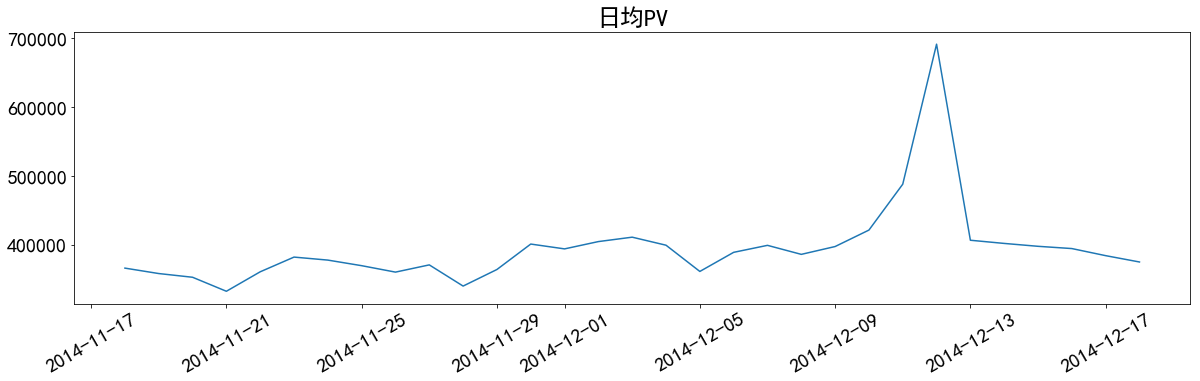

In [63]:
font = {
    'family':'SimHei','size':20
}
plt.rc("font",**font)

plt.figure(figsize=(20,5))
plt.plot(pv['date'],pv['pv'])

plt.xticks(rotation=30)
plt.title('日均PV')

# 保存图片
plt.savefig('日PV.png')

plt.show()

In [3]:
plt.figure(figsize=(20,5))
plt.plot(uv['date'],uv['uv'])

plt.xticks(rotation=30)
plt.title('日均UV')

# 保存图片
plt.savefig('日UV.png')

plt.show()

NameError: name 'plt' is not defined

- pv和uv都在双十二达到了高峰
- pv和uv在11.17号到12月7号流量都是比较平稳的，只有在双十二前后两天波动较大

## 每一个时刻的PV和UV值

In [65]:
pv_hour = data.groupby(['hour'])['user_id'].count().reset_index().rename(columns={'user_id':"pv"})
uv_hour = data.groupby(['hour'])['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':"uv"})



In [66]:
pv_hour.head()

,hour,pv
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487


In [67]:
uv_hour

,hour,uv
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765
5,5,2030
6,6,3564
7,7,5722
8,8,7108
9,9,7734


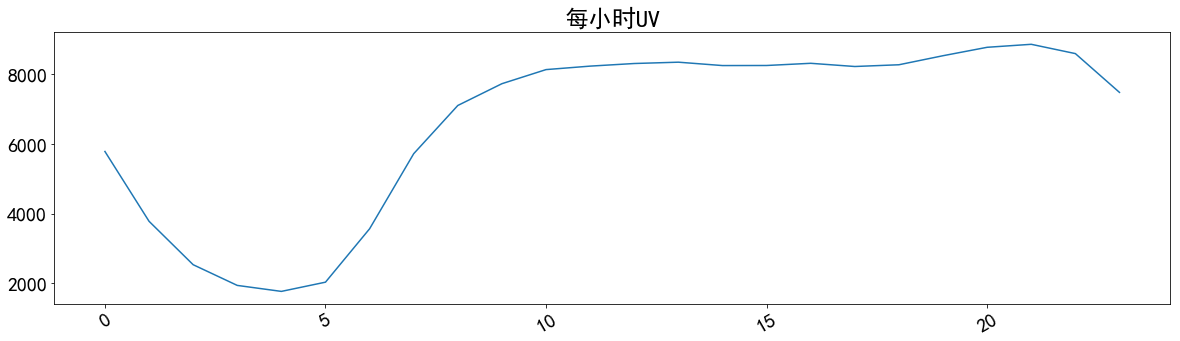

In [68]:
plt.figure(figsize=(20,5))
plt.plot(uv_hour['hour'],uv_hour['uv'])

plt.xticks(rotation=30)
plt.title('每小时UV')

# 保存图片
plt.savefig('每小时UV.png')

plt.show()

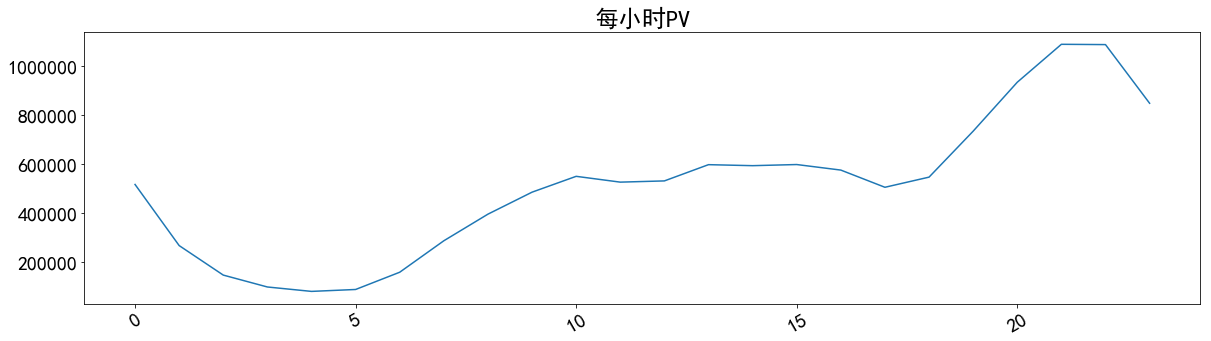

In [69]:
plt.figure(figsize=(20,5))
plt.plot(pv_hour['hour'],pv_hour['pv'])

plt.xticks(rotation=30)
plt.title('每小时PV')

# 保存图片
plt.savefig('每小时PV.png')

plt.show()

In [70]:
## 求每个UV平均访问深度
round(data['user_id'].shape[0]/data['user_id'].nunique(),2)

1225.69

In [71]:
## 求每个UV日均访问深度

round(data['user_id'].shape[0]/data['user_id'].nunique()/data['date'].nunique(),2)

39.54

- 每个UV的平均PV数是1225.69
- 每个UV的每日平均PV数是39.54

In [72]:
## 知识点预告：可视化 pyecharts

In [73]:
## 漏斗模型
# 计算每一个环节用户的访问量
view = data.groupby(['behavior_type'])['user_id'].count().reset_index().rename(columns={'user_id':"pv"})
view

,behavior_type,pv
0,1,11550581
1,2,242556
2,3,343564
3,4,120205


In [74]:
from pyecharts.charts import Funnel
attr = ['点击','收藏','加购物车','支付']
image_data = [(attr[i],int(view['pv'][i])) for i in range(len(attr))]
image_data

[('点击', 11550581), ('收藏', 242556), ('加购物车', 343564), ('支付', 120205)]

In [76]:
## 绘图
funnel = (Funnel().add(series_name='用户行为漏斗'
         ,data_pair=image_data))
funnel.render_notebook()